# Model Validation - What does it mean?
We've seen the use of a train-test split to check the accuracy of some trained model on test data. This process gives us some evidence to estimate the predictive accuracy of our model. As we've also seen, these accuracy scores change when we re-run the model. So, how can we report the accuracy of our model in a better way than "we ran it 10 times and it seems to do well each time"? 

## Cross-Validation
The idea to cross-validation is simple: we are going to split our entire set into parts, then take turns using each split part as the test part. Let's visualize this with some pie charts.

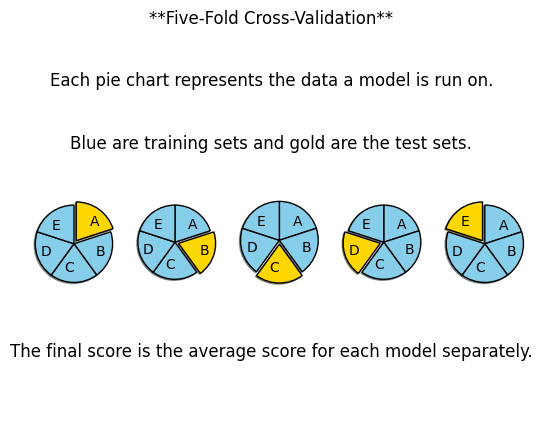

In [ ]:
import matplotlib.pyplot as plt

# Static definitions for pie charts
labels_list = ['A', 'B', 'C', 'D', 'E']
sizes = [20, 20, 20, 20, 20] # data split into 5 equal parts
color_dict = {
    'train': 'skyblue', 
    'test': 'gold'
}

def add_pie_subplot(test_index, axis):
    explode_list = []
    color_list = []

    for array_index in range(0, 5):
        if array_index == test_index:
            explode_list.append(0.1)
            color_list.append(color_dict['test'])
        else:
            explode_list.append(0)
            color_list.append(color_dict['train'])
    axis.pie(
        sizes, 
        explode=explode_list, 
        labels=labels_list, 
        colors=color_list, 
        shadow=True, startangle=90, counterclock=False, labeldistance=0.6,
        wedgeprops={'linewidth': 1, 'edgecolor': 'black'})
    axis.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    

# Plotting the pie chart
fig, ((ax0, ax1, ax2, ax3, ax4)) = plt.subplots(nrows=1, ncols=5)
add_pie_subplot(0, ax0)
add_pie_subplot(1, ax1)
add_pie_subplot(2, ax2)
add_pie_subplot(3, ax3)
add_pie_subplot(4, ax4)
fig.suptitle('**Five-Fold Cross-Validation**\n\n\nEach pie chart represents the data a model is run on.\n\n\nBlue are training sets and gold are the test sets.\n\n\n\n\n\n\n\n\n\nThe final score is the average score for each model separately.');

Luckily, computing a cross-validation in Python is relatively simple. Let's complete a cross-validation with SVM models with the wine database.

In [76]:
# import the functions needed from sklearn
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

# Load the wine dataset
wine = load_wine()

# Compute the accuracy score for each model in a five-fold cross-validation
all_scores = cross_val_score(SVC(), wine.data, wine.target, cv=5)
index = 1
for score in list(all_scores):
    print(f'Score on Model {index}: {round(score, 2)*100}%')
    index += 1
print(f'\nAverage Score across all models: {round(np.mean(all_scores), 2)*100}%')

Score on Model 1: 64.0%
Score on Model 2: 61.0%
Score on Model 3: 64.0%
Score on Model 4: 69.0%
Score on Model 5: 74.0%

Average Score across all models: 66.0%


In previous lessons, we looped running the model multiple times and took the average (known as Monte Carlo validation), so how is this different? In our previous method, we relied on a random split of the data. If we ran our model 10 times, do we know that **all** data was used to test the model at least once? No. Cross-validation ensures **all** data is used both to **train** and **test** the model while ensuring data is not used to both train and test the model at the same time.